# 1. 강의영상 

<https://youtu.be/playlist?list=PLQqh36zP38-xYMQe_6GKus4q8E6c5RNIS&si=QtTWrQUAXDgwhxBp>

# 2. Imports 

In [10]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.linear_model
import sklearn.tree
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
import warnings
warnings.filterwarnings("ignore")

# 3. Data

In [12]:
def generating_df(n_balance):
    df = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment.csv')
    df_balance = pd.DataFrame((np.random.randn(500,n_balance)).reshape(500,n_balance)*1,columns = ['balance'+str(i) for i in range(n_balance)])
    return pd.concat([df,df_balance],axis=1)

In [13]:
df = generating_df(10)
df

toeic       gpa  employment  balance0  balance1  balance2  balance3  \
0      135  0.051535           0  0.201954  0.913711 -0.589805  0.316196   
1      935  0.355496           0 -0.290880 -0.073337 -0.570444 -1.390016   
2      485  2.228435           0  1.333870  0.997310  1.500856  0.774262   
3       65  1.179701           0  1.764506  1.164117 -0.967719 -2.201651   
4      445  3.962356           1 -0.413176  0.988229  0.564624  0.885567   
..     ...       ...         ...       ...       ...       ...       ...   
495    280  4.288465           1  0.431759  2.153168  1.579232 -1.154426   
496    310  2.601212           1  0.716791 -0.428856 -0.770143 -0.362971   
497    225  0.042323           0  1.019516 -0.765429  1.868903 -0.285379   
498    320  1.041416           0 -1.195398  0.470352 -0.374949 -0.397581   
499    375  3.626883           1 -0.445898  0.390302 -0.403406 -0.528904   

     balance4  balance5  balance6  balance7  balance8  balance9  
0    1.285975  0.094634  1.781618 -0.810583  1.784278 -0.604258  
1    0.144310 -0.247668  1.736824 -0.766542 -0.279784 -1.525845  
2   -0.919978 -0.202276  1.419562 -0.185264 -0.782524  1.766982  
3    0.655650  0.655106 -1.416480 -0.927737  0.247814 -1.238919  
4    0.560682 -2.880517  0.714108  0.522645 -1.822700  0.794012  
..        ...       ...       ...       ...       ...       ...  
495  0.208956 -0.549120  1.676330 -0.015323  1.859426 -0.918818  
496  1.191776 -0.763958 -0.071902  1.107869  0.963393 -0.996926  
497  0.080620  2.006618 -1.155571 -0.395149 -0.430279  0.712161  
498  1.556866  0.281161 -0.217248 -1.649043  0.252582  0.817852  
499  1.745216  1.194092  0.627451  0.583121  1.058502 -1.095658  

[500 rows x 13 columns]

In [15]:
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.7, random_state=42)

In [16]:
X,y = df_train.drop(['employment'],axis=1), df_train['employment']
XX,yy = df_test.drop(['employment'],axis=1), df_test['employment']

# 4. 분석

`-` 분석1: 의사결정나무

In [17]:
## step1 -- pass
## step2 
predictr = sklearn.tree.DecisionTreeClassifier(random_state=42)
## step3 
predictr.fit(X,y)
## step4
df_train['employment'] = predictr.predict(X)
df_test['employment'] = predictr.predict(XX)
#--#
print(f'train_score = {predictr.score(X,y):.4f}')
print(f'test_score = {predictr.score(XX,yy):.4f}')

train_score = 1.0000
test_score = 0.7057


`-` 분석2: 로지스틱 + Ridge

:::{.callout-note}
## LogisticRegressionCV()에서 solver 선택하는 법

Warning The choice of the algorithm depends on the penalty chosen. Supported penalties by solver:
- `lbfgs` : ['l2']

- `liblinear` : ['l1', 'l2']

- `newton-cg` : ['l2']

- `newton-cholesky` : ['l2']

- `sag` : ['l2']

- `saga` : ['elasticnet', 'l1', 'l2']

- ref: <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html>
:::‘l1’, ‘l2’]

In [18]:
## step1 -- pass
## step2 
predictr = sklearn.linear_model.LogisticRegressionCV(penalty='l2') ## logistic + Ridge
## step3 
predictr.fit(X,y)
## step4
df_train['employment'] = predictr.predict(X)
df_test['employment'] = predictr.predict(XX)
#--#
print(f'train_score = {predictr.score(X,y):.4f}')
print(f'test_score = {predictr.score(XX,yy):.4f}')

train_score = 0.8733
test_score = 0.8743


`-` 분석3: 로지스틱 + Lasso 

In [21]:
## step1 -- pass
## step2 
predictr = sklearn.linear_model.LogisticRegressionCV(penalty='l1', solver='liblinear')
## step3 
predictr.fit(X,y)
## step4
df_train['employment'] = predictr.predict(X)
df_test['employment'] = predictr.predict(XX)
#--#
print(f'train_score = {predictr.score(X,y):.4f}')
print(f'test_score = {predictr.score(XX,yy):.4f}')

train_score = 0.8800
test_score = 0.8686


# 5. 연구

`-` Balance 변수들의 수가 커짐에 따라서 각 방법들(의사결정나무, 로지스틱+Ridge, 로지스틱+Lasso)의 train/test score는 어떻게 변화할까? 

`-` df, predictor -> train_score, test_score 와 같은 함수를 만들자. 

In [22]:
def anal(df,predictr):
    df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.7, random_state=42)
    X,y = df_train.drop(['employment'],axis=1), df_train['employment']
    XX,yy = df_test.drop(['employment'],axis=1), df_test['employment']
    ## step1 -- pass
    ## step2 -- pass 
    ## step3 
    predictr.fit(X,y)
    ## step4 -- pass 
    #--#
    return predictr.score(X,y),predictr.score(XX,yy)

In [23]:
predictr = sklearn.tree.DecisionTreeClassifier()

In [24]:
anal(df,predictr)

(1.0, 0.7085714285714285)

`-` 실험해보자. 

In [25]:
n_balance_lst = range(0,5000,50)

In [28]:
predictrs = [sklearn.tree.DecisionTreeClassifier(random_state=42), # dt
             sklearn.linear_model.LogisticRegressionCV(penalty='l2'), # logitstic + ridge
             sklearn.linear_model.LogisticRegressionCV(penalty='l1', solver='liblinear')] # logistic + lasso

In [32]:
# 4분 ~ 5분정도 걸림.
lst = [[anal(generating_df(n_balance),predictr) for predictr in predictrs] for n_balance in n_balance_lst]

In [65]:
np.array(lst).shape # 데이터셋의 개수 x 모델종류 x score(train / test)

(100, 3, 2)

`-` 실험결과 정리 

In [67]:
arr = np.array(lst)
tr = arr[:,:,0] # train score
tst = arr[:,:,1] # test score

In [76]:
df1 = pd.DataFrame(tr, columns = ['tree','ridge','lasso']).eval('dataset = "train"').eval('n_balance=@n_balance_lst')
df1

tree     ridge     lasso dataset  n_balance
0    1.0  0.866667  0.853333   train          0
1    1.0  0.773333  0.940000   train         50
2    1.0  0.980000  0.933333   train        100
3    1.0  0.986667  1.000000   train        150
4    1.0  0.886667  1.000000   train        200
..   ...       ...       ...     ...        ...
95   1.0  1.000000  1.000000   train       4750
96   1.0  1.000000  1.000000   train       4800
97   1.0  1.000000  0.526667   train       4850
98   1.0  1.000000  1.000000   train       4900
99   1.0  1.000000  0.526667   train       4950

[100 rows x 5 columns]

In [77]:
df2 = pd.DataFrame(tst, columns = ['tree','ridge','lasso']).eval('dataset = "test"').eval('n_balance = @n_balance_lst')
df2

tree     ridge     lasso dataset  n_balance
0   0.754286  0.877143  0.868571    test          0
1   0.762857  0.725714  0.857143    test         50
2   0.754286  0.805714  0.825714    test        100
3   0.720000  0.748571  0.831429    test        150
4   0.731429  0.714286  0.748571    test        200
..       ...       ...       ...     ...        ...
95  0.674286  0.640000  0.622857    test       4750
96  0.714286  0.597143  0.591429    test       4800
97  0.637143  0.602857  0.505714    test       4850
98  0.694286  0.591429  0.631429    test       4900
99  0.705714  0.608571  0.505714    test       4950

[100 rows x 5 columns]

- ridge랑 lasso는 score가 갈수록 현저히 떨어진다.

In [89]:
pd.concat([df1, df2]).set_index(['dataset','n_balance']).stack().reset_index().set_axis(['dataset','n_balance','method','score'], axis=1)

dataset  n_balance method     score
0     train          0   tree  1.000000
1     train          0  ridge  0.866667
2     train          0  lasso  0.853333
3     train         50   tree  1.000000
4     train         50  ridge  0.773333
..      ...        ...    ...       ...
595    test       4900  ridge  0.591429
596    test       4900  lasso  0.631429
597    test       4950   tree  0.705714
598    test       4950  ridge  0.608571
599    test       4950  lasso  0.505714

[600 rows x 4 columns]

In [90]:
df1= pd.DataFrame(tr,columns=['tree','ridge','lasso']).eval('dataset = "train"').eval('n_balance = @n_balance_lst')
df2= pd.DataFrame(tst,columns=['tree','ridge','lasso']).eval('dataset = "test"').eval('n_balance = @n_balance_lst')
result_df = pd.concat([df1,df2]).set_index(['dataset','n_balance']).stack().reset_index().set_axis(['dataset','n_balance','method','score'],axis=1)

<Axes: xlabel='n_balance', ylabel='score'>

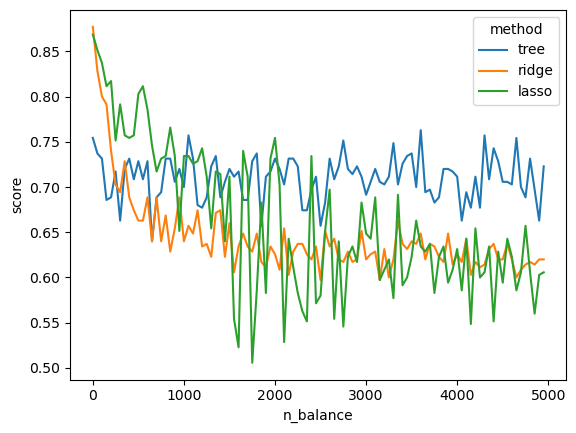

In [153]:
sns.lineplot(result_df.query('dataset=="test"'),x='n_balance',y='score',hue='method')

In [94]:
result_df.query('dataset=="test"')

dataset  n_balance method     score
300    test          0   tree  0.754286
301    test          0  ridge  0.877143
302    test          0  lasso  0.868571
303    test         50   tree  0.762857
304    test         50  ridge  0.725714
..      ...        ...    ...       ...
595    test       4900  ridge  0.591429
596    test       4900  lasso  0.631429
597    test       4950   tree  0.705714
598    test       4950  ridge  0.608571
599    test       4950  lasso  0.505714

[300 rows x 4 columns]

---

In [50]:
5000/50

100.0

In [57]:
df_ = np.array([[anal(generating_df(b),predictr) for predictr in predictrs] for b in range(0,100,50)])
df_

array([[[1.        , 0.75428571],
        [0.86666667, 0.87714286],
        [0.85333333, 0.87142857]],

       [[1.        , 0.74285714],
        [0.93333333, 0.83142857],
        [0.87333333, 0.87142857]]])

In [58]:
df_[:,:,0]

array([[1.        , 0.86666667, 0.85333333],
       [1.        , 0.93333333, 0.87333333]])

In [59]:
df_[:,:,1]

array([[0.75428571, 0.87714286, 0.87142857],
       [0.74285714, 0.83142857, 0.87142857]])

In [43]:
generating_df(2)

toeic       gpa  employment  balance0  balance1
0      135  0.051535           0 -1.007441 -0.522833
1      935  0.355496           0 -0.441027  0.367165
2      485  2.228435           0  0.793840 -1.796588
3       65  1.179701           0 -0.023520 -0.074258
4      445  3.962356           1 -0.802179  0.669743
..     ...       ...         ...       ...       ...
495    280  4.288465           1  1.048698  0.464401
496    310  2.601212           1  0.464867 -0.826916
497    225  0.042323           0  0.095497 -0.008625
498    320  1.041416           0  0.452554 -0.639249
499    375  3.626883           1 -0.998647 -1.187848

[500 rows x 5 columns]

In [39]:
# arr = np.array(lst)
arr[:,:,0].shape, arr[:,:,1].shape

((100, 3), (100, 3))